In [1]:
import pandas as pd
import numpy as np


In [2]:
green = pd.read_csv('grn.csv')

In [3]:
grn.head()

,Account id,Job id,Date,Start,End,Passenger,Pick up,Drop off,Vehicle #,Driver,...,Tariff,Extra 1,Extra 2,Extra 3,Sub total,E-ticket,E-ticket ref,Discount,FOP,Payable
0,NaN,19752637,01/22/2016,01/22/2016 17:33,01/22/2016 17:34,unknown,unknown,"2347 Salisbury Dr, San Diego, CA 92123, USA",679.0,"Green6, Farzad",...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,-,0.0
1,NaN,19752726,01/22/2016,01/22/2016 17:47,01/22/2016 17:48,TEST,"123 Camino De La Reina, San Diego, CA, United ...","San Diego International Airport, North Harbor ...",726.0,"Green, Corrie",...,50.0,NaN,NaN,NaN,50.0,NaN,NaN,0.0,C,0.0
2,NaN,19752839,01/22/2016,01/22/2016 18:02,01/22/2016 19:07,unknown,unknown,"2347 Salisbury Dr, San Diego, CA 92123, USA",679.0,"Green6, Farzad",...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,-,0.0
3,NaN,19754683,01/22/2016,01/22/2016 23:57,01/22/2016 23:59,Ferdous,"2347 Salisbury Drive, San Diego, CA, United St...","Downtown San Diego, San Diego, CA, United States",275.0,"iPhone7, Suzette",...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,-,0.0
4,NaN,19757548,01/23/2016,01/23/2016 13:30,01/23/2016 14:15,Roselyn,"San Diego International Airport, North Harbor ...","3075 Carlsbad Boulevard, Carlsbad, CA, United ...",679.0,"Green6, Farzad",...,64.0,NaN,NaN,NaN,64.0,NaN,NaN,0.0,C,0.0


In [4]:
grn.columns

Index(['Account id', 'Job id', 'Date', 'Start', 'End', 'Passenger', 'Pick up',
       'Drop off', 'Vehicle #', 'Driver ', 'Cost code ', 'Project ',
       'Reference ', 'Tariff ', 'Extra 1', 'Extra 2', 'Extra 3', 'Sub total ',
       'E-ticket ', 'E-ticket  ref  ', 'Discount ', 'FOP ', 'Payable '],
      dtype='object')

# ????? Least number of values
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.slice.html

In [5]:
green.Date.str.slice(0, 4).value_counts()

02/1    1349
03/1    1320
02/0    1303
02/2    1270
04/2    1232
06/1    1134
04/0    1131
03/2    1129
04/1    1100
07/2    1100
03/0    1092
05/2    1089
06/2    1074
05/1    1057
07/1    1053
05/0    1024
01/2    1006
06/0     936
10/1     842
07/0     833
09/2     825
10/2     801
09/1     768
11/0     749
11/1     743
12/0     731
08/2     708
10/0     693
01/1     679
08/1     664
09/0     658
12/1     590
08/0     567
11/2     564
12/2     529
01/0     433
01/3     285
03/3     249
07/3     179
05/3     174
08/3     138
10/3     136
04/3     116
06/3     110
12/3      90
09/3      73
11/3      65
Name: Date, dtype: int64

In [6]:
green.Date.str.slice(0, 4)

0        01/2
1        01/2
2        01/2
3        01/2
4        01/2
5        01/2
6        01/2
7        01/2
8        01/2
9        01/2
10       01/2
11       01/2
12       01/2
13       01/2
14       01/2
15       01/2
16       01/2
17       01/2
18       01/2
19       01/2
20       01/2
21       01/2
22       01/2
23       01/2
24       01/2
25       01/2
26       01/2
27       01/2
28       01/2
29       01/2
         ... 
34361    01/2
34362    01/2
34363    01/2
34364    01/2
34365    01/2
34366    01/2
34367    01/2
34368    01/2
34369    02/0
34370    02/0
34371    02/0
34372    02/0
34373    01/2
34374    02/0
34375    02/0
34376    02/0
34377    02/0
34378    02/0
34379    02/0
34380    01/3
34381    02/0
34382    02/0
34383    02/0
34384    02/0
34385    02/0
34386    02/0
34387    02/0
34388    02/0
34389    02/0
34390    02/0
Name: Date, Length: 34391, dtype: object

In [7]:
green.columns

Index(['Account id', 'Job id', 'Date', 'Start', 'End', 'Passenger', 'Pick up',
       'Drop off', 'Vehicle #', 'Driver ', 'Cost code ', 'Project ',
       'Reference ', 'Tariff ', 'Extra 1', 'Extra 2', 'Extra 3', 'Sub total ',
       'E-ticket ', 'E-ticket  ref  ', 'Discount ', 'FOP ', 'Payable '],
      dtype='object')

In [8]:
green.columns = green.columns.str.replace(' ', '_')

In [9]:
green.columns

Index(['Account_id', 'Job_id', 'Date', 'Start', 'End', 'Passenger', 'Pick_up',
       'Drop_off', 'Vehicle_#', 'Driver_', 'Cost_code_', 'Project_',
       'Reference_', 'Tariff_', 'Extra_1', 'Extra_2', 'Extra_3', 'Sub_total_',
       'E-ticket_', 'E-ticket__ref__', 'Discount_', 'FOP_', 'Payable_'],
      dtype='object')

In [10]:
combined = green.Drop_off.str.cat(green.End, sep=' ')

In [11]:
combined

0        2347 Salisbury Dr, San Diego, CA 92123, USA 01...
1        San Diego International Airport, North Harbor ...
2        2347 Salisbury Dr, San Diego, CA 92123, USA 01...
3        Downtown San Diego, San Diego, CA, United Stat...
4        3075 Carlsbad Boulevard, Carlsbad, CA, United ...
5        DoubleTree by Hilton Hotel San Diego Hotel Cir...
6            San Diego, CA, United States 01/23/2016 21:25
7        San Diego Airport, North Harbor Drive, San Die...
8        San Diego Airport, North Harbor Drive, San Die...
9        San Diego International Airport, North Harbor ...
10       San Diego International Airport, North Harbor ...
11       San Diego International Airport, North Harbor ...
12       Hyatt Regency Mission Bay Spa and Marina, Quiv...
13       4925 Maynard Street, San Diego, CA, United Sta...
14       2168-2186 Avenida De La Playa, La Jolla, CA 92...
15       4233 Sunnyhill Dr, Carlsbad, CA 92008, United ...
16       Old Town, San Diego, CA, United States 01/25/2.

# Datetime Datapye

In [12]:
#green['stop_datetime'] = pd.to_datetime(combined)

In [13]:
green.dtypes

Account_id          object
Job_id               int64
Date                object
Start               object
End                 object
Passenger           object
Pick_up             object
Drop_off            object
Vehicle_#          float64
Driver_             object
Cost_code_         float64
Project_           float64
Reference_         float64
Tariff_            float64
Extra_1            float64
Extra_2            float64
Extra_3            float64
Sub_total_         float64
E-ticket_          float64
E-ticket__ref__    float64
Discount_          float64
FOP_                object
Payable_           float64
dtype: object

In [14]:
#green.stop_datetime.dt.year

In [15]:
green.columns

Index(['Account_id', 'Job_id', 'Date', 'Start', 'End', 'Passenger', 'Pick_up',
       'Drop_off', 'Vehicle_#', 'Driver_', 'Cost_code_', 'Project_',
       'Reference_', 'Tariff_', 'Extra_1', 'Extra_2', 'Extra_3', 'Sub_total_',
       'E-ticket_', 'E-ticket__ref__', 'Discount_', 'FOP_', 'Payable_'],
      dtype='object')

In [16]:
green.Driver_.plot

In [17]:
green.groupby(green.Tariff_).Sub_total_.mean().plot()

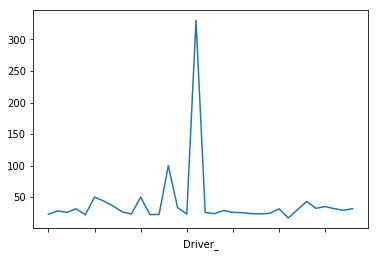

In [39]:
green.groupby(green.Driver_).Sub_total_.mean().plot()

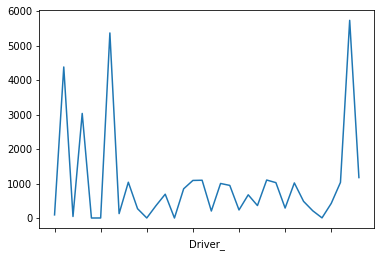

In [38]:
green.groupby(green.Driver_).Sub_total_.count().plot()

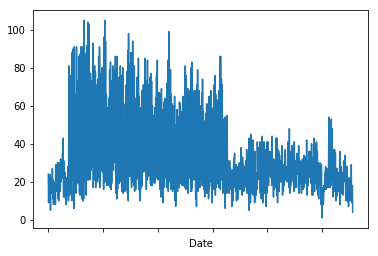

In [40]:
green.groupby(green.Date).Sub_total_.count().plot()

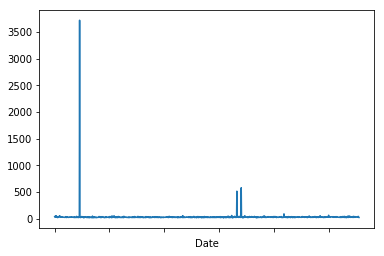

In [35]:
green.groupby(green.Date).Sub_total_.mean().plot()

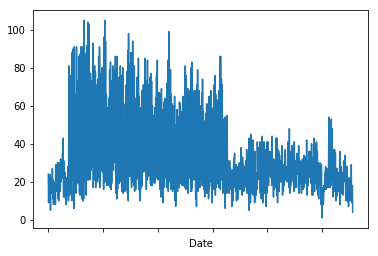

In [37]:
green.groupby(green.Date).Sub_total_.count().plot()

# new_df = df.rename(columns={'new_name':'old_name'})

In [24]:
new_green = green.rename(columns={'Car':'Vehicle_#'})

In [25]:
new_green.columns

Index(['Account_id', 'Job_id', 'Date', 'Start', 'End', 'Passenger', 'Pick_up',
       'Drop_off', 'Vehicle_#', 'Driver_', 'Cost_code_', 'Project_',
       'Reference_', 'Tariff_', 'Extra_1', 'Extra_2', 'Extra_3', 'Sub_total_',
       'E-ticket_', 'E-ticket__ref__', 'Discount_', 'FOP_', 'Payable_'],
      dtype='object')

In [26]:
grn.groupby(grn.Car).Subtotal_.mean().plot()

AttributeError: 'DataFrame' object has no attribute 'Car'

In [ ]:
green